In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
#Defining categories
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

#Train the data on these categories
train = fetch_20newsgroups(subset = 'train', categories = categories)

#Test the data on these categories
test = fetch_20newsgroups(subset = 'test', categories = categories)

print('Training data set length', len(train.data))
print('Training data set length', len(test.data))

Training data set length 11314
Training data set length 7532


In [9]:
print(train.data[7])

From: bgrubb@dante.nmsu.edu (GRUBB)
Subject: Re: IDE vs SCSI
Organization: New Mexico State University, Las Cruces, NM
Lines: 44
Distribution: world
NNTP-Posting-Host: dante.nmsu.edu

DXB132@psuvm.psu.edu writes:
>In article <1qlbrlINN7rk@dns1.NMSU.Edu>, bgrubb@dante.nmsu.edu (GRUBB) says:
>>In PC Magazine April 27, 1993:29 "Although SCSI is twice as fasst as ESDI,
>>20% faster than IDE, and support up to 7 devices its acceptance ...has   
>>long been stalled by incompatability problems and installation headaches."
                                                                      
>I love it when magazine writers make stupid statements like that re:      
>performance. Where do they get those numbers? I'll list the actual
>performance ranges, which should convince anyone that such a               
>statement is absurd:                                                     
>SCSI-I ranges from 0-5MB/s.                                                
>SCSI-II ranges from 0-40MB/s.     

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline


In [13]:
# Creating multinomial Naive Bayes model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Training the model
model.fit(train.data, train.target)

# Predicting labels for the test data
labels = model.predict(test.data)


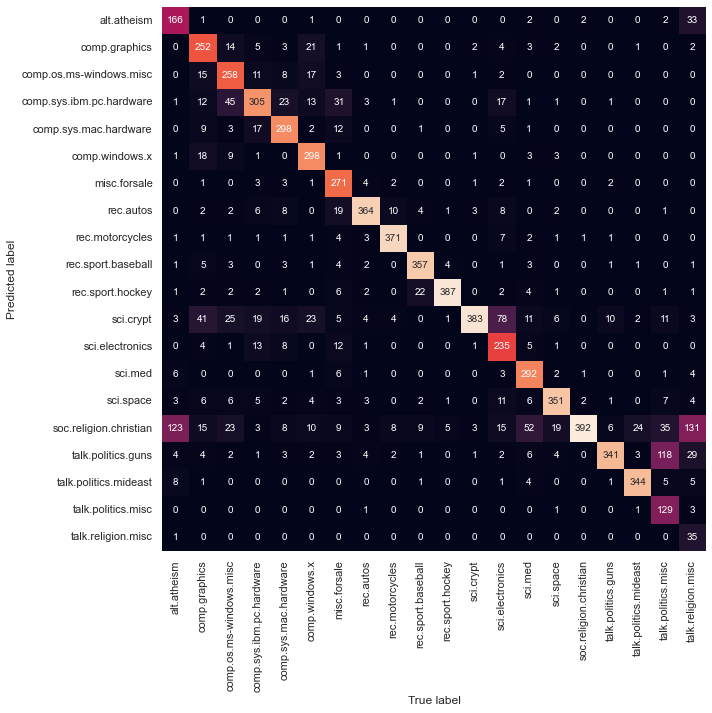

In [16]:
# Creating confusion matrix and heatmap
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, labels)

plt.figure(figsize=(12, 10))  # Set the figsize to adjust the size of the heatmap

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names,
            yticklabels=train.target_names)

# Heatmap on confusion matrix
plt.xlabel('True label')
plt.ylabel('Predicted label')

plt.show()


In [17]:
#Predicting category on new data based on trained model

def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

## Testing the model

In [42]:
predict_category('The Book of Genesis')

'soc.religion.christian'

In [43]:
predict_category('India launches new rocket')

'sci.space'

In [44]:
predict_category('Mercedes verses BMW')

'rec.autos'

In [45]:
predict_category('New SWAPO members of 2028')

'talk.politics.mideast'

In [46]:
predict_category("Top 10 pop songs of 2020")

'misc.forsale'

In [47]:
predict_category('Mental health awareness')

'sci.med'